# maxvogt-analysis: Buchs SG

The code in this notebook is based on [Martin Fleischmann's](https://martinfleischmann.net/) 2021 workshop [*Capturing the Structure of Cities with Data Science (SDSC)*](https://github.com/martinfleis/sdsc21-workshop), licensed under the [CC BY-SA 4.0 license](https://creativecommons.org/licenses/by-sa/4.0/). © 2021 Martin Fleischmann.

The geodata in this notebook is retrieved from OpenStreetMap. © OpenStreetMap Contributors.

<hr>

This notebook contains geodata and analyses for the following items of the [Max Vogt collection](https://mtwente.github.io/maxvogt/) by Moritz Twente and Luisa Omonsky:
- [BU001](https://mtwente.github.io/maxvogt/items/bu001.html)
- [BU006](https://mtwente.github.io/maxvogt/items/bu006.html)
- [BU084](https://mtwente.github.io/maxvogt/items/bu084.html)
- [BU085](https://mtwente.github.io/maxvogt/items/bu085.html)

<hr>

Open in an interactive in-browser environment: 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/mtwente/maxvogt-analysis/main?labpath=analysis%2Fbuchs.ipynb)

In [1]:
import warnings

import geopandas
import libpysal
import momepy
import osmnx
import pandas

from clustergram import Clustergram

import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh.plotting import show

Pick a place, ideally a town with a good coverage in OpenStreetMap and its local CRS.

In [2]:
place = 'Buchs SG'
local_crs = 'EPSG:2056'

In [3]:
geopandas.tools.geocode(place).explore()

## Input data

Download data from OpenStreetMap.

### Buildings

In [4]:
buildings = osmnx.features.features_from_place(place, tags={'building':True})

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


In [5]:
buildings

geometry  \
element_type osmid                                                         
way          37926842  POLYGON ((9.47302 47.17271, 9.47309 47.17252, ...   
             48759345  POLYGON ((9.47336 47.15920, 9.47365 47.15924, ...   
             48762152  POLYGON ((9.47303 47.16123, 9.47319 47.16126, ...   
             48803583  POLYGON ((9.41841 47.14650, 9.41823 47.14641, ...   
             48803589  POLYGON ((9.41788 47.14673, 9.41793 47.14664, ...   
...                                                                  ...   
relation     1639327   POLYGON ((9.47880 47.16951, 9.47881 47.16947, ...   
             1651087   POLYGON ((9.47279 47.16479, 9.47271 47.16476, ...   
             4581804   POLYGON ((9.46789 47.16584, 9.46799 47.16594, ...   
             7596015   POLYGON ((9.47049 47.17401, 9.47107 47.17410, ...   
             17867718  POLYGON ((9.47884 47.16778, 9.47880 47.16787, ...   

                      amenity access  fee covered operator addr:housenumber  \
element_type osmid                                                            
way          37926842     NaN    NaN  NaN     NaN      NaN                4   
             48759345     NaN    NaN  NaN     NaN      NaN              10a   
             48762152     NaN    NaN  NaN     NaN      NaN               16   
             48803583     NaN    NaN  NaN     NaN      NaN              NaN   
             48803589     NaN    NaN  NaN     NaN      NaN              NaN   
...                       ...    ...  ...     ...      ...              ...   
relation     1639327      NaN    NaN  NaN     NaN      NaN              NaN   
             1651087      NaN    NaN  NaN     NaN      NaN               31   
             4581804      NaN    NaN  NaN     NaN      NaN              NaN   
             7596015      NaN    NaN  NaN     NaN      NaN               17   
             17867718     NaN    NaN  NaN     NaN      NaN              NaN   

                             addr:street tourism  \
element_type osmid                                 
way          37926842  Werdenbergstrasse     NaN   
             48759345         Kreuzgasse     NaN   
             48762152        Grofstrasse     NaN   
             48803583                NaN     NaN   
             48803589                NaN     NaN   
...                                  ...     ...   
relation     1639327                 NaN     NaN   
             1651087       Grünaustrasse     NaN   
             4581804                 NaN     NaN   
             7596015     Hanflandstrasse     NaN   
             17867718                NaN     NaN   

                                                                   nodes  ...  \
element_type osmid                                                        ...   
way          37926842  [445234448, 445234442, 445234443, 445234446, 4...  ...   
             48759345  [618786765, 618786768, 618786770, 9582935250, ...  ...   
             48762152  [618809054, 618809056, 618809057, 618809058, 6...  ...   
             48803583  [619223869, 619223871, 619223873, 619223875, 6...  ...   
             48803589  [619223942, 619223943, 619223944, 619223945, 6...  ...   
...                                                                  ...  ...   
relation     1639327   [[[1339769217, 1339769503, 6046585689, 1260543...  ...   
             1651087   [[[1349612717, 1349612720, 1349612714, 1349612...  ...   
             4581804   [[[3344873788, 3344873789, 3344873790, 3344873...  ...   
             7596015   [[[445225513, 3934309799, 1337186910, 13371870...  ...   
             17867718  [[[1339490325, 12069878302, 12069878313, 12069...  ...   

                      historic military lockable bunker_type location bench  \
element_type osmid                                                            
way          37926842      NaN      NaN      NaN         NaN      NaN   NaN   
             48759345      NaN      NaN      NaN         NaN      NaN   NaN   


In [6]:
buildings.geom_type.value_counts()

Polygon    2928
Name: count, dtype: int64

In [7]:
buildings = buildings[buildings.geom_type == "Polygon"].reset_index(drop=True)

In [8]:
buildings = buildings[["geometry"]].to_crs(local_crs)

In [9]:
buildings["uID"] = range(len(buildings))

In [10]:
buildings

geometry   uID
0     POLYGON ((2754213.206 1226638.204, 2754218.968...     0
1     POLYGON ((2754277.976 1225136.670, 2754299.900...     1
2     POLYGON ((2754247.161 1225362.223, 2754259.436...     2
3     POLYGON ((2750148.372 1223619.114, 2750135.007...     3
4     POLYGON ((2750107.106 1223643.985, 2750111.623...     4
...                                                 ...   ...
2923  POLYGON ((2754660.730 1226293.623, 2754662.003...  2923
2924  POLYGON ((2754219.049 1225757.057, 2754212.982...  2924
2925  POLYGON ((2753844.797 1225864.402, 2753852.069...  2925
2926  POLYGON ((2754017.966 1226777.720, 2754061.864...  2926
2927  POLYGON ((2754668.708 1226100.931, 2754665.849...  2927

[2928 rows x 2 columns]

### Streets

In comparison to Martin Fleischmann's workshop, I here set `truncate_by_edge` to be `True`.
Depending on the OSM mapping quality of the place at hand, it might also be necessary to change the value of `network_type`. See [geopandas documentation](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.graph.graph_from_place) for options.

In [11]:
osm_graph = osmnx.graph_from_place(place, network_type='drive', truncate_by_edge=True)

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


In [12]:
osm_graph = osmnx.projection.project_graph(osm_graph, to_crs=local_crs)

In [13]:
streets = osmnx.graph_to_gdfs(
    osm_graph, 
    nodes=False, 
    edges=True,
    node_geometry=False, 
    fill_edge_geometry=True
)

In [14]:
streets.explore()

In [15]:
streets

osmid  \
u           v           key                                                   
30122810    30122818    0    [1159084528, 1159084529, 366844282, 366844279]   
30122818    3190343831  0                                         366844303   
            241613336   0                   [22516170, 552406626, 25762269]   
3190343831  270124860   0                  [366844304, 32057698, 366844286]   
241613336   59433915    0                                          22516172   
...                                                                     ...   
7820333247  7820333246  0                                         837879582   
7820333248  7820333249  0                                         837879581   
8482145529  8482145530  0                                         913099893   
9957092649  9957092648  0                                        1086705101   
11226897877 11226897928 0                                        1211812402   

                             oneway   lanes  ref        highway maxspeed  \
u           v           key                                                
30122810    30122818    0      True  [2, 3]  A13       motorway      120   
30122818    3190343831  0      True       2  A13       motorway      120   
            241613336   0      True  [2, 1]  A13  motorway_link       60   
3190343831  270124860   0      True  [3, 2]  A13       motorway      120   
241613336   59433915    0      True       1  A13  motorway_link       60   
...                             ...     ...  ...            ...      ...   
7820333247  7820333246  0     False     NaN  NaN    residential      NaN   
7820333248  7820333249  0     False     NaN  NaN    residential      NaN   
8482145529  8482145530  0     False     NaN  NaN    residential      NaN   
9957092649  9957092648  0     False     NaN  NaN    residential      NaN   
11226897877 11226897928 0     False     NaN  NaN   unclassified      NaN   

                            reversed    length bridge  \
u           v           key                             
30122810    30122818    0      False  3391.074    yes   
30122818    3190343831  0      False  1079.750    NaN   
            241613336   0      False   324.967    NaN   
3190343831  270124860   0      False  2001.988    NaN   
241613336   59433915    0      False   221.358    NaN   
...                              ...       ...    ...   
7820333247  7820333246  0       True     9.053    NaN   
7820333248  7820333249  0      False     7.979    NaN   
8482145529  8482145530  0       True   112.959    NaN   
9957092649  9957092648  0       True    11.695    NaN   
11226897877 11226897928 0       True    65.755    NaN   

                                                                      geometry  \
u           v           key                                                      
30122810    30122818    0    LINESTRING (2755594.560 1230076.114, 2755520.9...   
30122818    3190343831  0    LINESTRING (2755147.038 1226789.084, 2755159.9...   
            241613336   0    LINESTRING (2755147.038 1226789.084, 2755143.8...   
3190343831  270124860   0    LINESTRING (2755428.207 1225747.303, 2755465.1...   
241613336   59433915    0    LINESTRING (2755200.808 1226470.013, 2755204.9...   
...                                                                        ...   
7820333247  7820333246  0    LINESTRING (2754810.506 1223902.921, 2754819.5...   
7820333248  7820333249  0    LINESTRING (2754804.008 1223854.641, 2754812.0...   
8482145529  8482145530  0    LINESTRING (2754478.667 1224886.202, 2754371.6...   
9957092649  9957092648  0    LINESTRING (2754067.660 1225371.327, 2754063.4...   
11226897877 11226897928 0    LINESTRING (2755049.157 1225749.062, 2755045.1...   

                                 name access junction width tunnel  
u           v           key                                         
30122810    30122818    0         NaN    NaN      NaN   NaN    NaN  
30122818    3190343831  0         NaN

In [16]:
streets = momepy.remove_false_nodes(streets)
streets = streets[["geometry"]]
streets["nID"] = range(len(streets))

In [17]:
streets

geometry   nID
0     LINESTRING (2755594.560 1230076.114, 2755520.9...     0
1     LINESTRING (2755147.038 1226789.084, 2755159.9...     1
2     LINESTRING (2755147.038 1226789.084, 2755143.8...     2
3     LINESTRING (2755428.207 1225747.303, 2755465.1...     3
4     LINESTRING (2755200.808 1226470.013, 2755204.9...     4
...                                                 ...   ...
1044  LINESTRING (2755458.377 1224327.238, 2755429.4...  1044
1045  LINESTRING (2755451.988 1224168.792, 2755469.3...  1045
1046  LINESTRING (2755510.771 1223941.908, 2755485.7...  1046
1047  LINESTRING (2755415.250 1226254.866, 2755455.9...  1047
1048  LINESTRING (2755997.642 1223804.352, 2755913.0...  1048

[1049 rows x 2 columns]

## Generated data

### Tessellation

We can generate a spatail unit using Voronoi tessellation with given building footprints.

In [18]:
limit = momepy.buffered_limit(buildings, 100)

tessellation = momepy.Tessellation(buildings, "uID", limit, verbose=False, segment=1)
tessellation = tessellation.tessellation

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:426: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47900/1328706492.py:3: FutureWarning: Class based API like `momepy.Tessellation` is deprecated. Replace it with `momepy.morphological_tessellation` or `momepy.enclosed_tessellation` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  tessellation = momepy.Tessellation(buildings, "uID", limit, verbose=False, segment=1)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mtwente/anaconda3/envs/m

### Link streets

Link unique IDs of streets to buildings and tessellation cells based on the nearest neighbor join.

In [19]:
buildings = buildings.sjoin_nearest(streets, max_distance=1000, how="left")

In [20]:
buildings

geometry   uID  index_right  \
0     POLYGON ((2754213.206 1226638.204, 2754218.968...     0          218   
0     POLYGON ((2754213.206 1226638.204, 2754218.968...     0          334   
1     POLYGON ((2754277.976 1225136.670, 2754299.900...     1           53   
2     POLYGON ((2754247.161 1225362.223, 2754259.436...     2           73   
3     POLYGON ((2750148.372 1223619.114, 2750135.007...     3          950   
...                                                 ...   ...          ...   
2924  POLYGON ((2754219.049 1225757.057, 2754212.982...  2924          126   
2925  POLYGON ((2753844.797 1225864.402, 2753852.069...  2925          385   
2926  POLYGON ((2754017.966 1226777.720, 2754061.864...  2926          218   
2926  POLYGON ((2754017.966 1226777.720, 2754061.864...  2926          334   
2927  POLYGON ((2754668.708 1226100.931, 2754665.849...  2927         1004   

       nID  
0      218  
0      334  
1       53  
2       73  
3      950  
...    ...  
2924   126  
2925   385  
2926   218  
2926   334  
2927  1004  

[4324 rows x 4 columns]

In [21]:
buildings = buildings.drop_duplicates("uID").drop(columns="index_right")

In [22]:
tessellation = tessellation.merge(buildings[['uID', 'nID']], on='uID', how='left')

## Measure

Measure individual morphometric characters.

### Dimensions

In [23]:
buildings["area"] = buildings.area
tessellation["area"] = tessellation.area
streets["length"] = streets.length

### Shape

In [24]:
buildings['eri'] = momepy.EquivalentRectangularIndex(buildings).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47900/1902756608.py:1: FutureWarning: Class based API like `momepy.EquivalentRectangularIndex` is deprecated. Replace it with `momepy.equivalent_rectangular_index` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings['eri'] = momepy.EquivalentRectangularIndex(buildings).series
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/pandas/core/arraylike.py:492: RuntimeWarning: invalid value encountered in oriented_envelope
  return getattr(ufunc, method)(*new_inputs, **kwargs)


In [25]:
buildings['elongation'] = momepy.Elongation(buildings).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47900/3723954296.py:1: FutureWarning: Class based API like `momepy.Elongation` is deprecated. Replace it with `momepy.elongation` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings['elongation'] = momepy.Elongation(buildings).series
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/pandas/core/arraylike.py:492: RuntimeWarning: invalid value encountered in oriented_envelope
  return getattr(ufunc, method)(*new_inputs, **kwargs)


In [26]:
tessellation['convexity'] = momepy.Convexity(tessellation).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47900/2335586521.py:1: FutureWarning: Class based API like `momepy.Convexity` is deprecated. Replace it with `momepy.convexity` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  tessellation['convexity'] = momepy.Convexity(tessellation).series


In [27]:
streets["linearity"] = momepy.Linearity(streets).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47900/3802614628.py:1: FutureWarning: Class based API like `momepy.Linearity` is deprecated. Replace it with `momepy.linearity` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  streets["linearity"] = momepy.Linearity(streets).series


/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


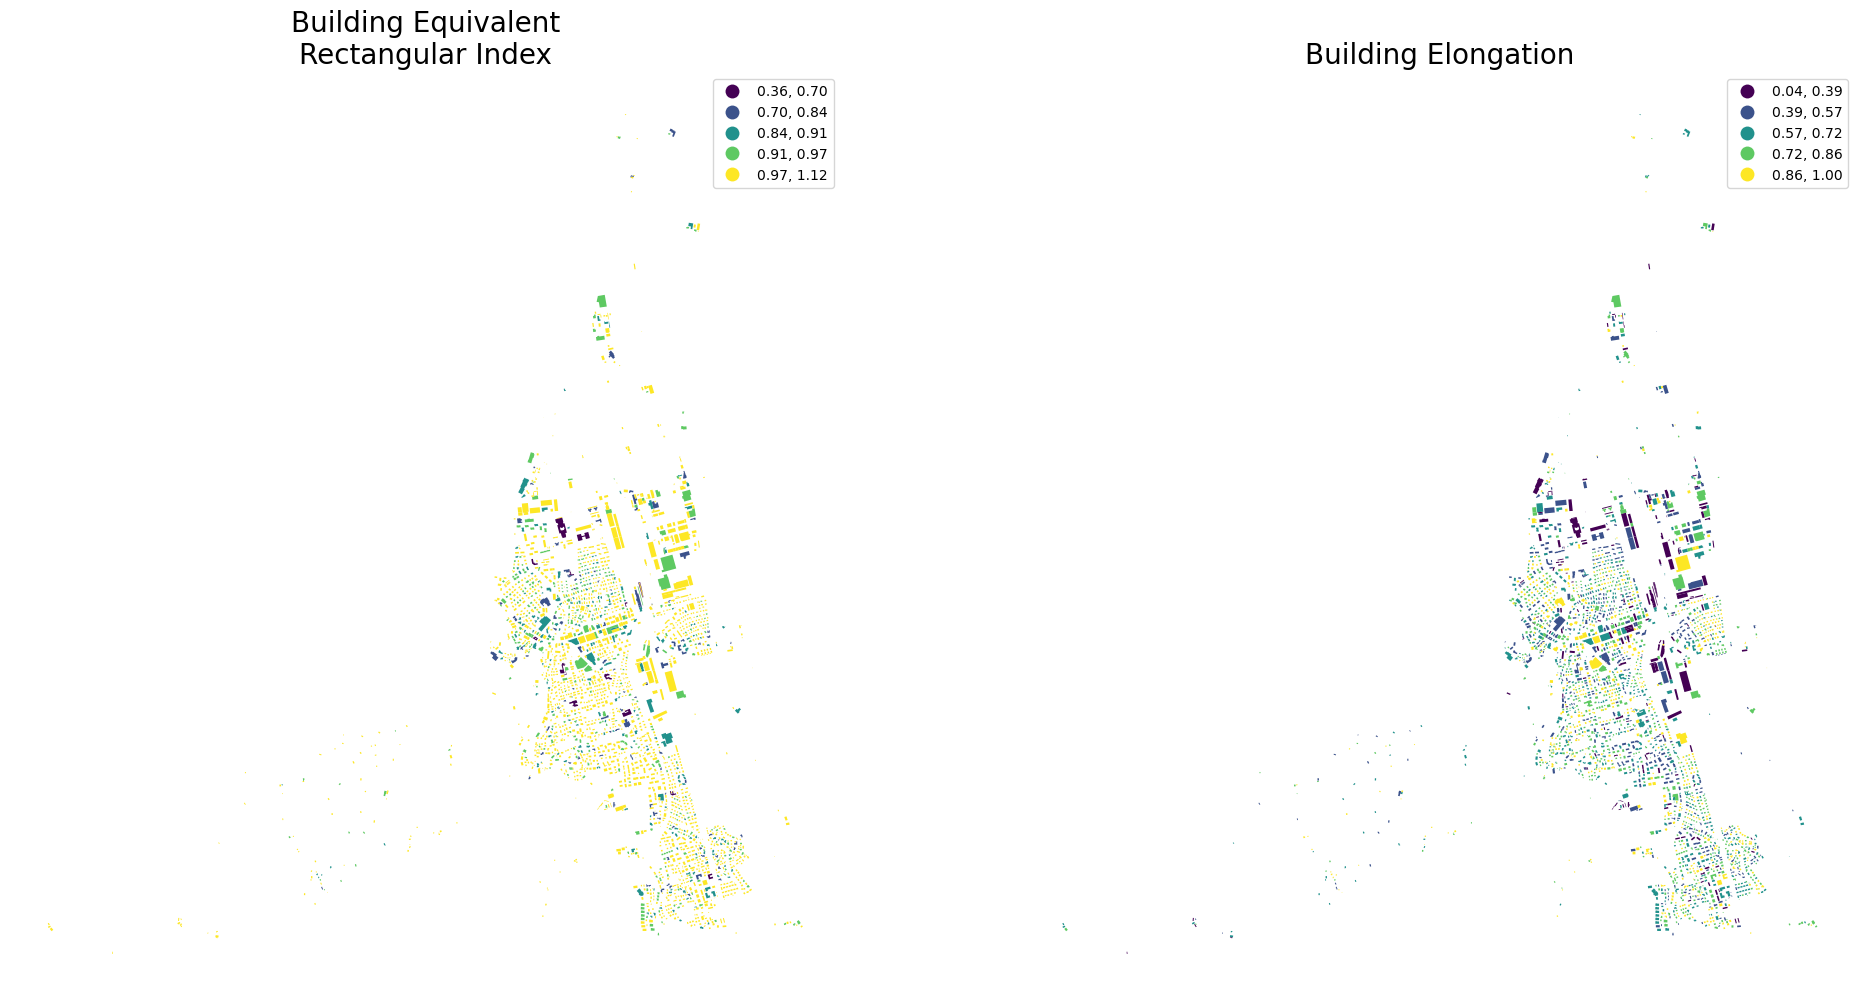

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

buildings.plot("eri", ax=ax[0], scheme="natural_breaks", legend=True)
buildings.plot("elongation", ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Building Equivalent\nRectangular Index', fontsize=20)
ax[1].set_title('Building Elongation', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Buchs/eri_and_elongation.pdf')  

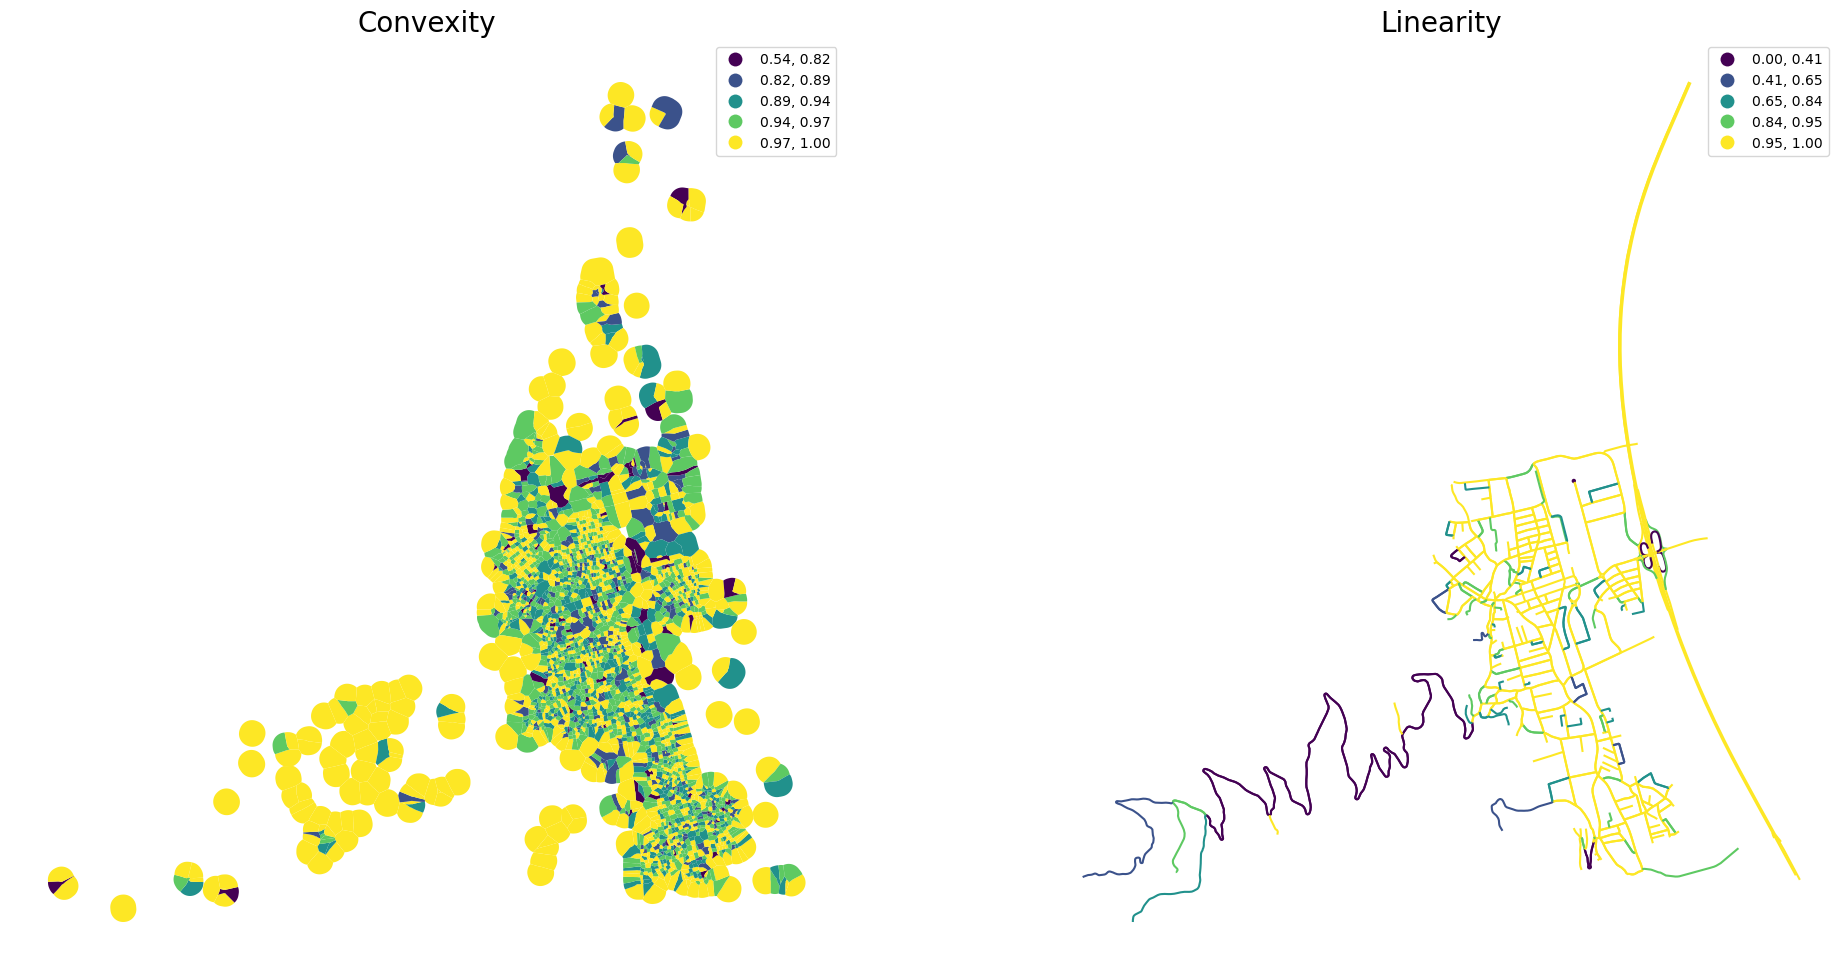

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

tessellation.plot("convexity", ax=ax[0], scheme="natural_breaks", legend=True)
streets.plot("linearity", ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Convexity', fontsize=20)
ax[1].set_title('Linearity', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Buchs/convexity_and_linearity.pdf')  

### Spatial distribution

In [30]:
buildings["shared_walls"] = momepy.SharedWallsRatio(buildings).series

/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/momepy/distribution.py:214: FutureWarning: Class based API like `momepy.SharedWalls` or `momepy.SharedWallsRatio` is deprecated. Replace it with `momepy.shared_walls` or explicitly computing `momepy.shared_walls / gdf.length` respectively to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  super().__init__(gdf)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


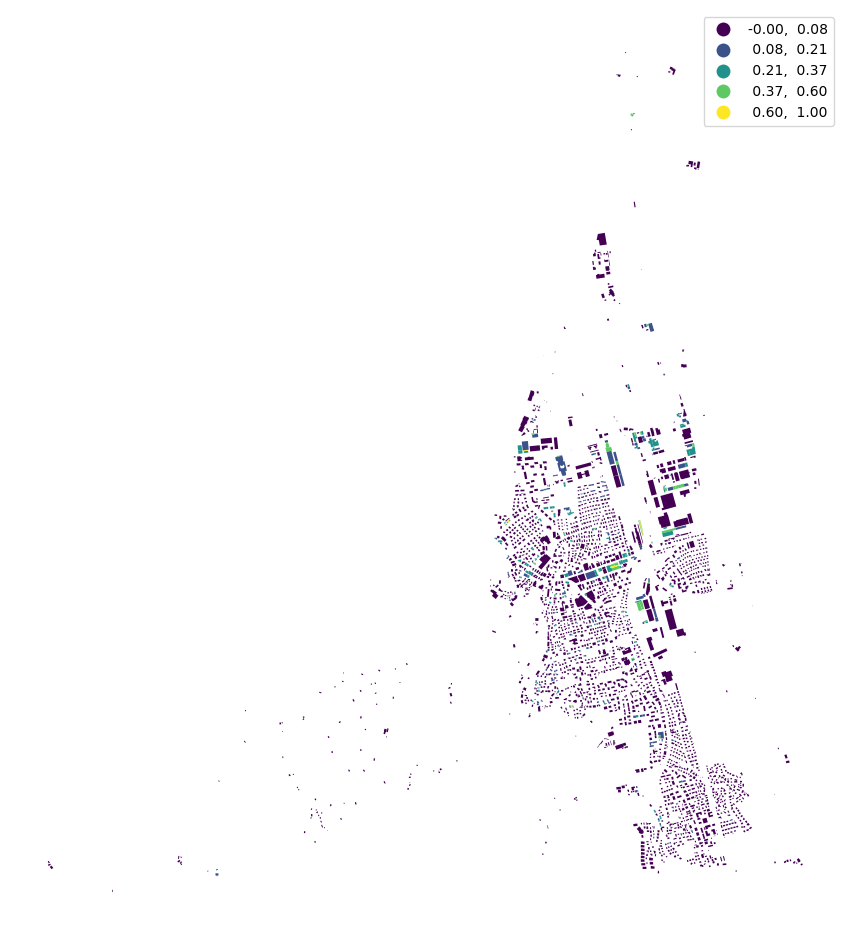

In [31]:
buildings.plot("shared_walls", figsize=(12, 12), scheme="natural_breaks", legend=True).set_axis_off()

plt.savefig('../results/Buchs/sharedwalls.pdf')  

Generate spatial weights matrix using `libpysal`.

In [32]:
queen_1 = libpysal.weights.contiguity.Queen.from_dataframe(tessellation, ids="uID", silence_warnings=True)

In [33]:
tessellation["neighbors"] = momepy.Neighbors(tessellation, queen_1, "uID", weighted=True, verbose=False).series
tessellation["covered_area"] = momepy.CoveredArea(tessellation, queen_1, "uID", verbose=False).series

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    buildings["neighbor_distance"] = momepy.NeighborDistance(buildings, queen_1, "uID", verbose=False).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47900/1669107924.py:1: FutureWarning: Class based API like `momepy.Neighbors` is deprecated. Replace it with `momepy.neighbors` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  tessellation["neighbors"] = momepy.Neighbors(tessellation, queen_1, "uID", weighted=True, verbose=False).series
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47900/1669107924.py:2: FutureWarning: `momepy.CoveredArea` is deprecated. Replace it with `.describe()` method of libpysal.graph.Graph or pin momepy version <1.0. This class will be removed in 1.0. 
  tessellation["covered_area"] = momepy.CoveredArea(tessellation, queen_1, "uID", verbose=False).series


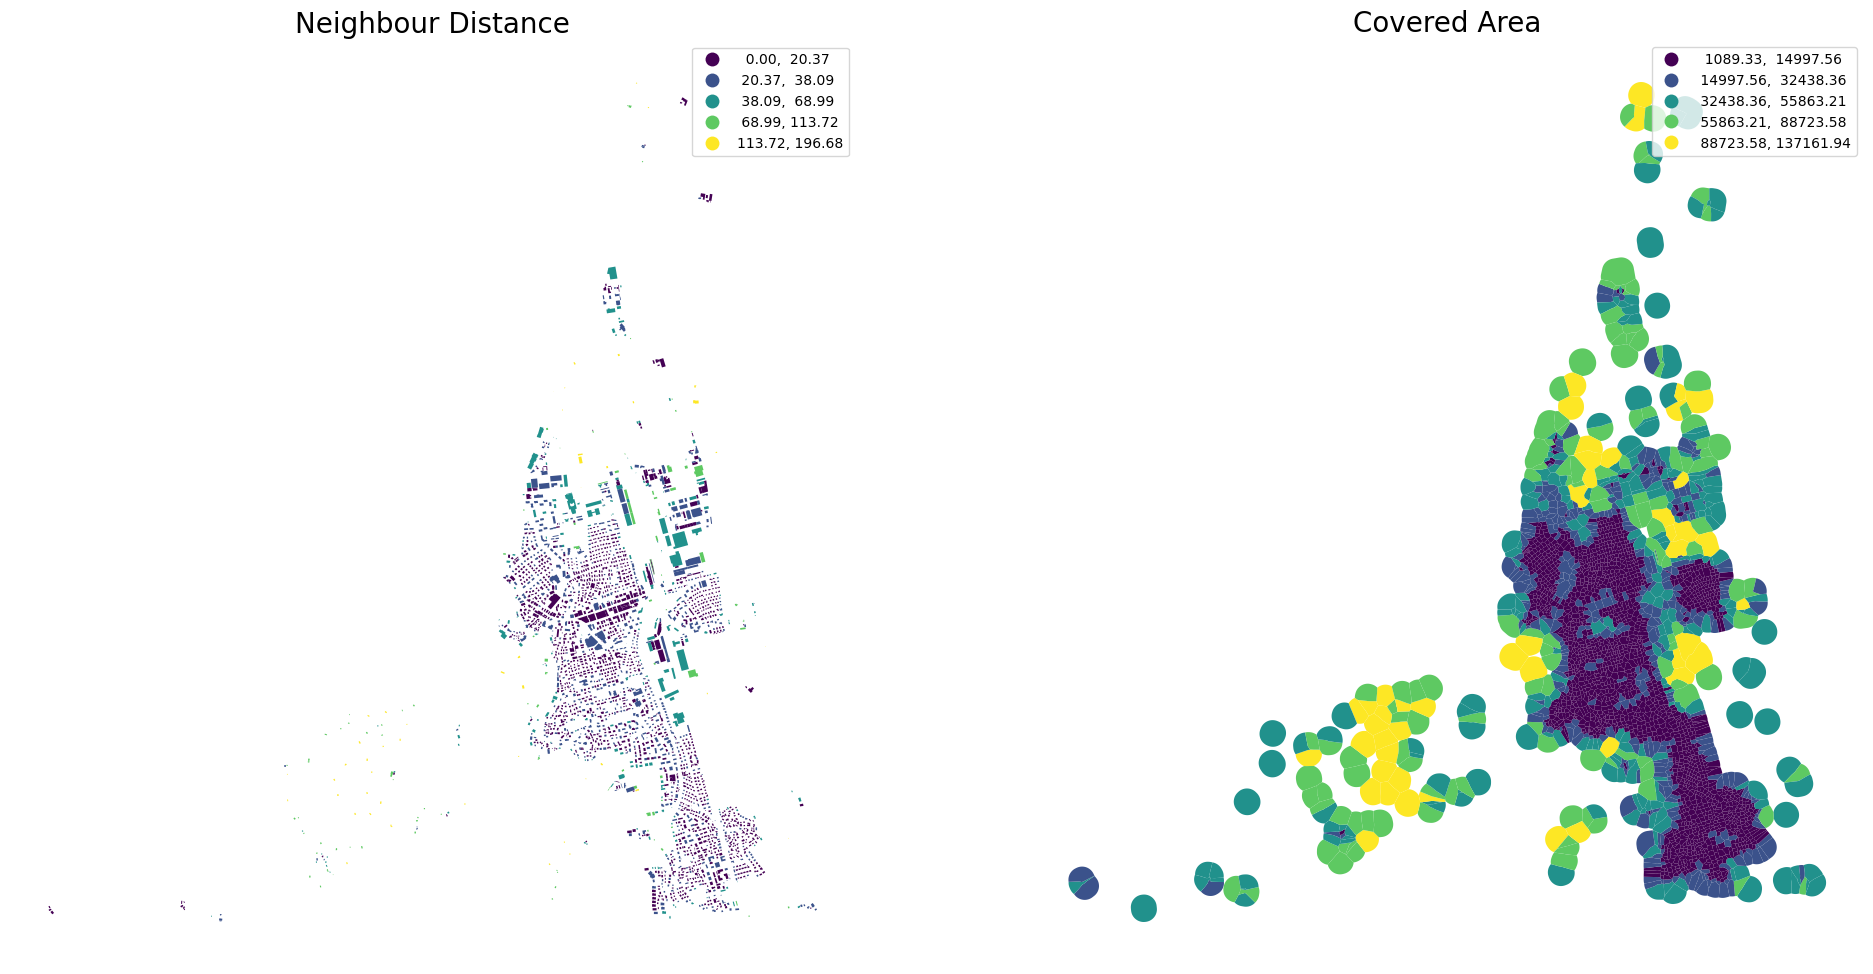

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

buildings.plot("neighbor_distance", ax=ax[0], scheme="natural_breaks", legend=True)
tessellation.plot("covered_area", ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Neighbour Distance', fontsize=20)
ax[1].set_title('Covered Area', fontsize=20)


ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Buchs/neighbourdist_and_coveredarea.pdf')  

In [35]:
queen_3 = momepy.sw_high(k=3, weights=queen_1)
buildings_q1 = libpysal.weights.contiguity.Queen.from_dataframe(buildings, silence_warnings=True)

buildings['interbuilding_distance'] = momepy.MeanInterbuildingDistance(buildings, queen_1, 'uID', queen_3, verbose=False).series
buildings['adjacency'] = momepy.BuildingAdjacency(buildings, queen_3, 'uID', buildings_q1, verbose=False).series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47900/3221532125.py:1: FutureWarning: `momepy.sw_high` is deprecated. Replace it with .higher_order() method of libpysal.graph.Graph or pin momepy version <1.0. This class will be removed in 1.0. 
  queen_3 = momepy.sw_high(k=3, weights=queen_1)
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47900/3221532125.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  buildings_q1 = libpysal.weights.contiguity.Queen.from_dataframe(buildings, silence_warnings=True)
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47900/3221532125.py:4: FutureWarning: Class based API like `momepy.MeanInterbuildingDistance` is deprecated. Replace it with `momepy.mean_interbuilding_distance` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings['interbuilding_distance'] 

In [36]:
#fig, ax = plt.subplots(1, 2, figsize=(24, 12))
#
#buildings.plot("interbuilding_distance", ax=ax[0], scheme="natural_breaks", legend=True)
#buildings.plot("adjacency", ax=ax[1], scheme="natural_breaks", legend=True)
#
#ax[0].set_axis_off()
#ax[1].set_axis_off()

In [37]:
profile = momepy.StreetProfile(streets, buildings)
streets["width"] = profile.w
streets["width_deviation"] = profile.wd
streets["openness"] = profile.o

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47900/2648127835.py:1: FutureWarning: Class based API like `momepy.StreetProfile` is deprecated. Replace it with `momepy.street_profile` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  profile = momepy.StreetProfile(streets, buildings)
/Users/mtwente/anaconda3/envs/maxvogt/lib/python3.11/site-packages/pandas/core/arraylike.py:492: RuntimeWarning: invalid value encountered in intersection
  return getattr(ufunc, method)(*new_inputs, **kwargs)


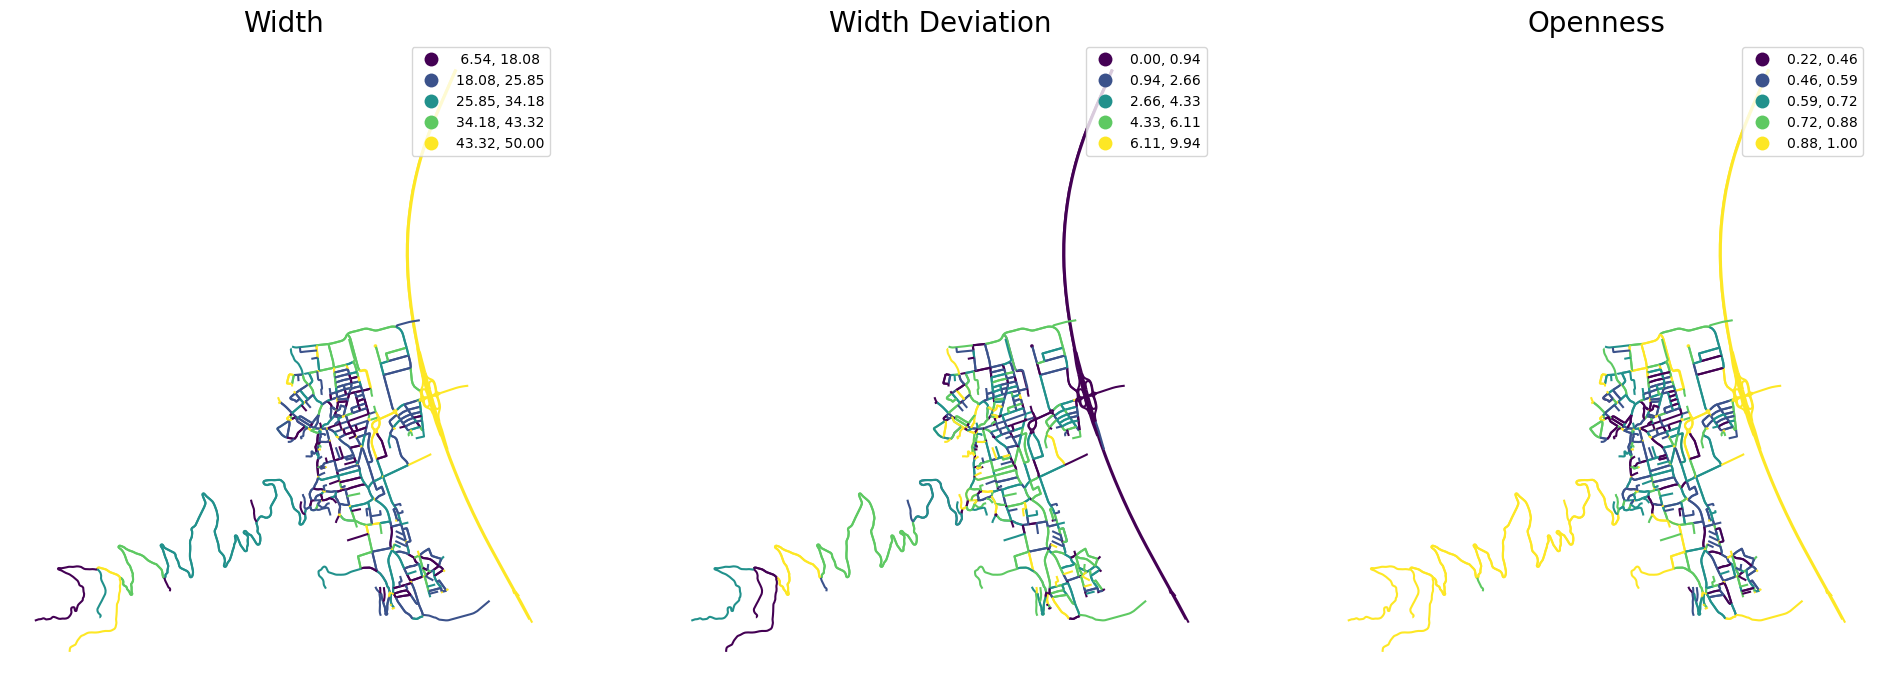

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(24, 12))

streets.plot("width", ax=ax[0], scheme="natural_breaks", legend=True)
streets.plot("width_deviation", ax=ax[1], scheme="natural_breaks", legend=True)
streets.plot("openness", ax=ax[2], scheme="natural_breaks", legend=True)

ax[0].set_title('Width', fontsize=20)
ax[1].set_title('Width Deviation', fontsize=20)
ax[2].set_title('Openness', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

plt.savefig('../results/Buchs/road_network.pdf')  

### Intensity

In [39]:
tessellation['car'] = momepy.AreaRatio(tessellation, buildings, 'area', 'area', 'uID').series

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47900/1819725789.py:1: FutureWarning: `momepy.AreaRatio` is deprecated. Replace it with a direct division of areas or momepy.describe_agg() or pin momepy version <1.0. This class will be removed in 1.0. 
  tessellation['car'] = momepy.AreaRatio(tessellation, buildings, 'area', 'area', 'uID').series


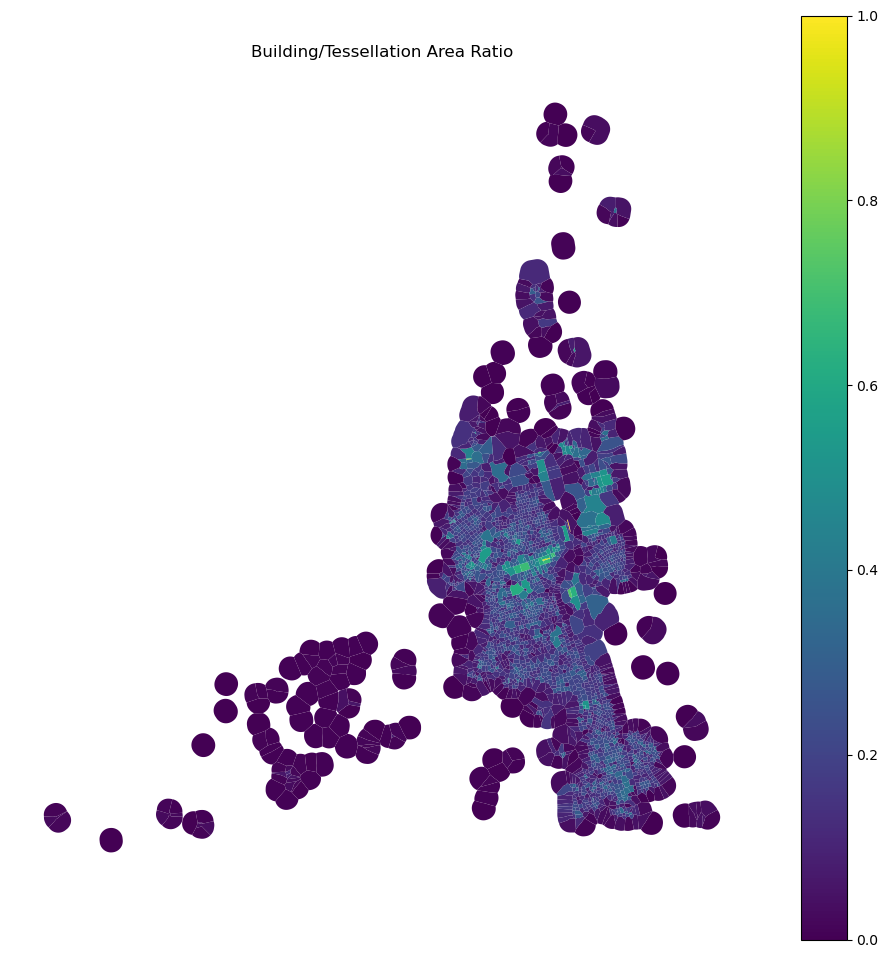

In [40]:
tessellation.plot("car", figsize=(12, 12), vmin=0, vmax=1, legend=True).set_axis_off()
plt.title("Building/Tessellation Area Ratio")

plt.savefig('../results/Buchs/tessellation_ratio.pdf')  

### Connectivity

In [41]:
graph = momepy.gdf_to_nx(streets)

In [42]:
graph = momepy.node_degree(graph)
graph = momepy.closeness_centrality(graph, radius=400, distance="mm_len")
graph = momepy.meshedness(graph, radius=400, distance="mm_len")

  0%|          | 0/477 [00:00<?, ?it/s]

  0%|          | 0/477 [00:00<?, ?it/s]

In [43]:
nodes, streets = momepy.nx_to_gdf(graph)

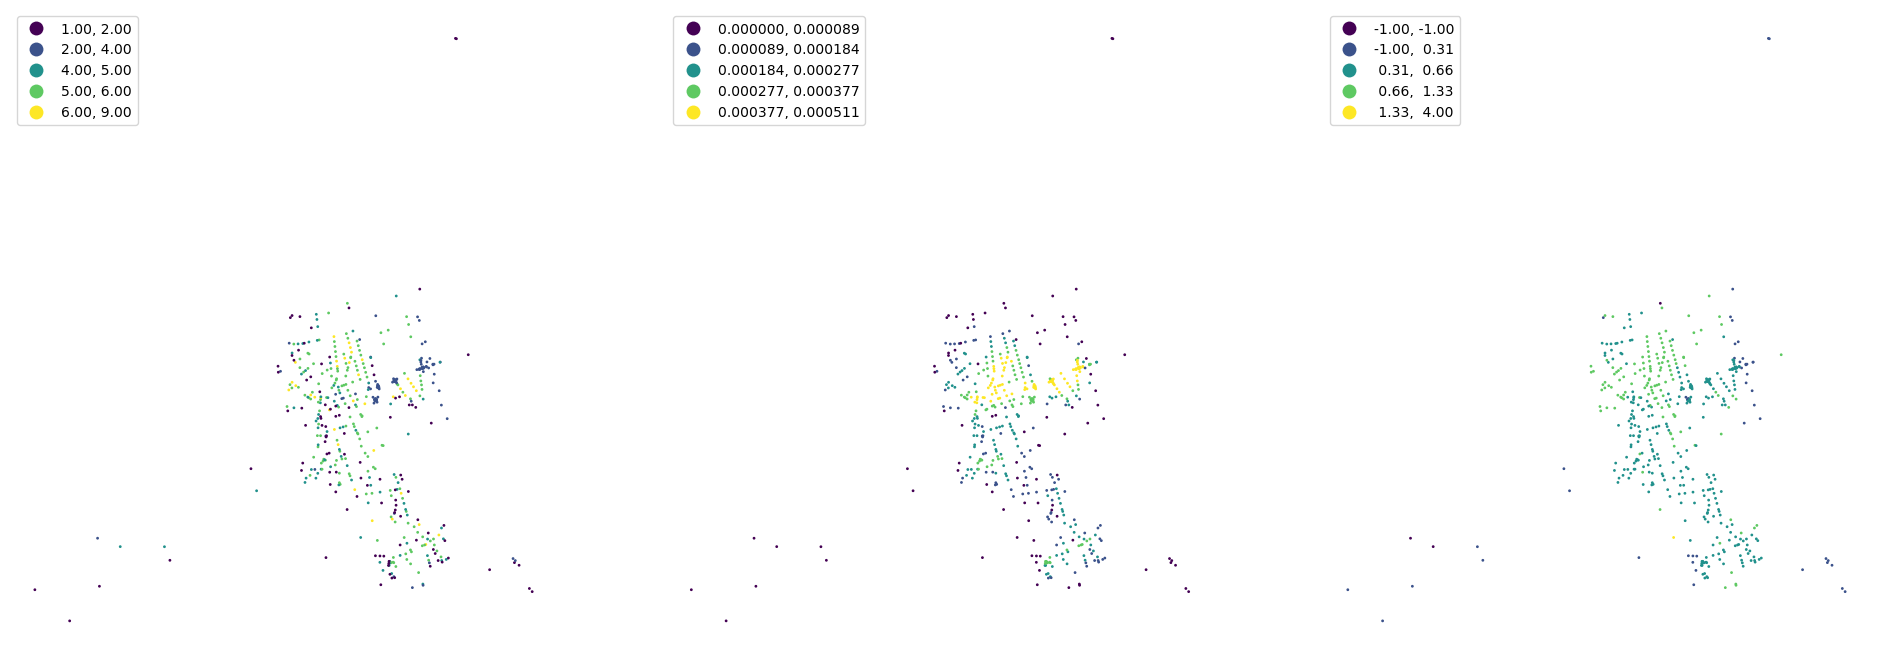

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(24, 12))

nodes.plot("degree", ax=ax[0], scheme="natural_breaks", legend=True, markersize=1)
nodes.plot("closeness", ax=ax[1], scheme="natural_breaks", legend=True, markersize=1, legend_kwds={"fmt": "{:.6f}"})
nodes.plot("meshedness", ax=ax[2], scheme="natural_breaks", legend=True, markersize=1)

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

plt.savefig('../results/Buchs/connectivity.pdf')  

In [45]:
buildings["nodeID"] = momepy.get_node_id(buildings, nodes, streets, "nodeID", "nID")

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47900/403706460.py:1: FutureWarning: Class based API like `momepy.get_node_id` is deprecated. Replace it with `momepy.get_nearest_node` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  buildings["nodeID"] = momepy.get_node_id(buildings, nodes, streets, "nodeID", "nID")


  0%|          | 0/2928 [00:00<?, ?it/s]

Link all data together (to tessellation cells or buildings).

In [46]:
tessellation

uID                                           geometry  nID  \
0     1165  POLYGON ((2751355.040 1223549.138, 2751392.276...  953   
1     1687  POLYGON ((2753889.557 1223776.323, 2753890.810...  981   
2     1163  POLYGON ((2750617.399 1223334.422, 2750612.381...  950   
3        3  POLYGON ((2750054.672 1223560.381, 2750060.346...  950   
4        4  POLYGON ((2750079.564 1223654.774, 2750080.072...  950   
...    ...                                                ...  ...   
2923  1679  POLYGON ((2754936.747 1227397.340, 2754920.854...  951   
2924  1680  POLYGON ((2754984.078 1227540.408, 2754983.066...  951   
2925  1646  POLYGON ((2755100.729 1228948.579, 2755100.604...  951   
2926  1645  POLYGON ((2755096.144 1228999.877, 2755095.441...  951   
2927  1639  POLYGON ((2754849.745 1229643.736, 2754853.141...  951   

              area  convexity  neighbors  covered_area       car  
0     11353.859232   0.994237   0.004812  42672.397474  0.008076  
1     26903.096396   0.995248   0.001614  48522.671922  0.003579  
2     35912.204898   1.000000   0.000000  35912.204898  0.002423  
3     22213.962541   0.994439   0.001716  30435.885794  0.016889  
4      8221.923253   0.686470   0.003653  48490.457975  0.026644  
...            ...        ...        ...           ...       ...  
2923  33625.438536   0.961660   0.005705  96578.765916  0.028308  
2924  29292.717411   0.999566   0.003172  72770.304830  0.006952  
2925   7831.925078   0.980711   0.005570  35128.186137  0.004871  
2926  20239.107851   0.977758   0.007109  51071.702994  0.049105  
2927  40144.662728   0.842994   0.001155  52228.914300  0.031263  

[2928 rows x 8 columns]

In [47]:
merged = tessellation.merge(buildings.drop(columns=['nID', 'geometry']), on='uID')
merged = merged.merge(streets.drop(columns='geometry'), on='nID', how='left')
merged = merged.merge(nodes.drop(columns='geometry'), on='nodeID', how='left')

In [48]:
merged.columns

Index(['uID', 'geometry', 'nID', 'area_x', 'convexity', 'neighbors',
       'covered_area', 'car', 'area_y', 'eri', 'elongation', 'shared_walls',
       'neighbor_distance', 'interbuilding_distance', 'adjacency', 'nodeID',
       'length', 'linearity', 'width', 'width_deviation', 'openness', 'mm_len',
       'node_start', 'node_end', 'x', 'y', 'degree', 'closeness',
       'meshedness'],
      dtype='object')

## Understanding the context

Measure first, second and third quartile of distribution of values within an area around each building.

In [49]:
percentiles = []
for column in merged.columns.drop(["uID", "nodeID", "nID", 'mm_len', 'node_start', 'node_end', "geometry"]):
    perc = momepy.Percentiles(merged, column, queen_3, "uID", verbose=False).frame
    perc.columns = [f"{column}_" + str(x) for x in perc.columns]
    percentiles.append(perc)

/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47900/962013058.py:3: FutureWarning: Class based API like `momepy.Percentiles` is deprecated. Replace it with `momepy.percentile` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  perc = momepy.Percentiles(merged, column, queen_3, "uID", verbose=False).frame
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47900/962013058.py:3: FutureWarning: Class based API like `momepy.Percentiles` is deprecated. Replace it with `momepy.percentile` to use functional API instead or pin momepy version <1.0. Class-based API will be removed in 1.0. 
  perc = momepy.Percentiles(merged, column, queen_3, "uID", verbose=False).frame
/var/folders/vs/1r1r5k5x12v5dj0w9z79tj3c0000gn/T/ipykernel_47900/962013058.py:3: FutureWarning: Class based API like `momepy.Percentiles` is deprecated. Replace it with `momepy.percentile` to use functional API instead or pin momepy version <1.0. Class-based API

In [50]:
percentiles_joined = pandas.concat(percentiles, axis=1)

In [51]:
percentiles_joined

area_x_25     area_x_50     area_x_75  convexity_25  convexity_50  \
0     10137.731429  11353.859232  14380.513422      0.981643      0.991219   
1     16803.403250  21471.637384  23139.017061      0.989006      0.993110   
2     35912.204898  35912.204898  35912.204898      1.000000      1.000000   
3     13138.247717  18054.572181  20134.267361      0.836536      0.986602   
4     13138.247717  18054.572181  20134.267361      0.836536      0.986602   
...            ...           ...           ...           ...           ...   
2923   9852.148883  15726.573464  20677.614219      0.909838      0.961660   
2924  12789.361174  19488.494754  24985.165815      0.932298      0.961660   
2925   7444.539143  11385.894872  15141.712742      0.978905      0.980381   
2926   7444.539143  11385.894872  15141.712742      0.978905      0.980381   
2927  26114.457150  26114.457150  26114.457150      0.918173      0.918173   

      convexity_75  neighbors_25  neighbors_50  neighbors_75  covered_area_25  \
0         0.994237      0.006402      0.007231      0.008073     46139.164796   
1         0.996198      0.005071      0.007023      0.007596     63032.559648   
2         1.000000      0.000000      0.000000      0.000000     35912.204898   
3         0.990521      0.001799      0.001883      0.002768     28356.190614   
4         0.990521      0.001799      0.001883      0.002768     28356.190614   
...            ...           ...           ...           ...              ...   
2923      0.989274      0.004652      0.007028      0.008732     54827.987137   
2924      0.993719      0.004567      0.007028      0.008478     66606.101588   
2925      0.984285      0.006065      0.006834      0.010771     40290.178304   
2926      0.984285      0.006065      0.006834      0.010771     40290.178304   
2927      0.918173      0.001739      0.001739      0.001739     52228.914300   

      ...          y_75  degree_25  degree_50  degree_75  closeness_25  \
0     ...  1.223609e+06        1.0        1.0        1.0      0.000000   
1     ...  1.223947e+06        1.0        1.0        1.0      0.000000   
2     ...  1.223568e+06        1.0        1.0        1.0      0.000000   
3     ...  1.223568e+06        1.0        1.0        1.0      0.000000   
4     ...  1.223568e+06        1.0        1.0        1.0      0.000000   
...   ...           ...        ...        ...        ...           ...   
2923  ...  1.226789e+06        4.0        4.0        4.0      0.000006   
2924  ...  1.226789e+06        4.0        4.0        4.0      0.000006   
2925  ...  1.230076e+06        2.0        2.0        2.0      0.000000   
2926  ...  1.230076e+06        2.0        2.0        2.0      0.000000   
2927  ...  1.230076e+06        2.0        2.0        2.0      0.000000   

      closeness_50  closeness_75  meshedness_25  meshedness_50  meshedness_75  
0         0.000000      0.000000            0.0            0.0            0.0  
1         0.000000      0.000000           -0.0           -0.0           -0.0  
2         0.000000      0.000000            0.0            0.0            0.0  
3         0.000000      0.000000           -0.0            0.0           -0.0  
4         0.000000      0.000000           -0.0            0.0           -0.0  
...            ...           ...            ...            ...            ...  
2923      0.000006      0.000006            0.0            0.0            0.0  
2924      0.000006      0.000006           -0.0            0.0           -0.0  
2925      0.000000      0.000000           -0.0           -0.0           -0.0  
2926      0.000000      0.000000           -0.0           -0.0           -0.0  
2927      0.000000      0.000000           -0.0           -0.0           -0.0  

[2928 rows x 66 columns]

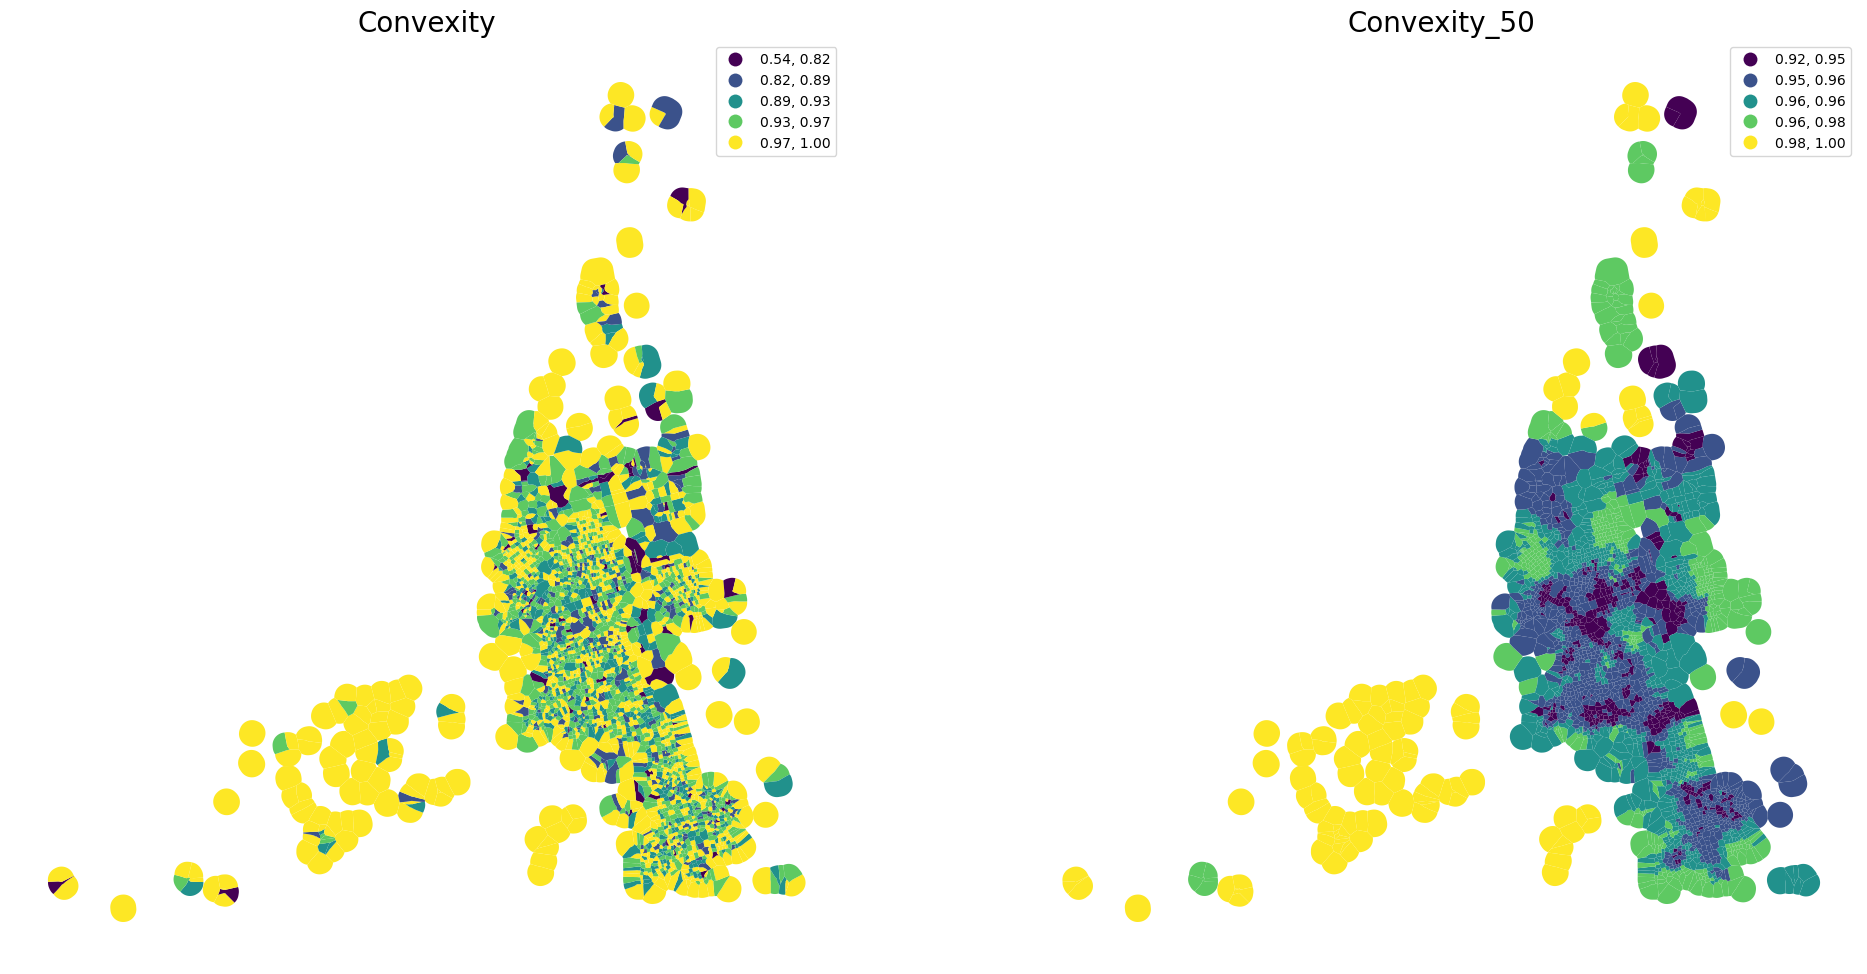

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

tessellation.plot("convexity", ax=ax[0], scheme="natural_breaks", legend=True)
merged.plot(percentiles_joined['convexity_50'].values, ax=ax[1], scheme="natural_breaks", legend=True)

ax[0].set_title('Convexity', fontsize=20)
ax[1].set_title('Convexity_50', fontsize=20)

ax[0].set_axis_off()
ax[1].set_axis_off()

plt.savefig('../results/Buchs/convexity.pdf')  

## Clustering

Standardize values before clustering.

In [54]:
standardized = (percentiles_joined - percentiles_joined.mean()) / percentiles_joined.std()

In [55]:
standardized

area_x_25  area_x_50  area_x_75  convexity_25  convexity_50  \
0      2.780054   2.367565   2.180879      2.985980      3.173174   
1      4.919012   4.974411   3.932004      3.417198      3.351997   
2     11.050867   8.695023   6.485803      4.060970      4.003610   
3      3.742895   4.094004   3.331252     -5.511314      2.736601   
4      3.742895   4.094004   3.331252     -5.511314      2.736601   
...         ...        ...        ...           ...           ...   
2923   2.688413   3.494195   3.439886     -1.218814      0.377939   
2924   3.630940   4.463454   4.301113      0.096439      0.377939   
2925   1.915831   2.375819   2.333069      2.825652      2.148299   
2926   1.915831   2.375819   2.333069      2.825652      2.148299   
2927   7.906851   6.170633   4.526897     -0.730747     -3.734576   

      convexity_75  neighbors_25  neighbors_50  neighbors_75  covered_area_25  \
0         2.692397     -2.137677     -2.643707     -3.006642         2.809770   
1         2.965845     -2.244369     -2.659716     -3.041012         4.156662   
2         3.495914     -2.650809     -3.199386     -3.589018         1.994387   
3         2.174190     -2.506586     -3.054689     -3.389326         1.391954   
4         2.174190     -2.506586     -3.054689     -3.389326         1.391954   
...            ...           ...           ...           ...              ...   
2923      2.000292     -2.277932     -2.659348     -2.959086         3.502520   
2924      2.620080     -2.284742     -2.659348     -2.977428         4.441576   
2925      1.304717     -2.164721     -2.674260     -2.812019         2.343437   
2926      1.304717     -2.164721     -2.674260     -2.812019         2.343437   
2927     -7.913502     -2.511402     -3.065736     -3.463547         3.295299   

      ...      y_75  degree_25  degree_50  degree_75  closeness_25  \
0     ... -1.858493  -1.795915  -4.107503  -4.496675     -1.523795   
1     ... -1.512279  -1.795915  -4.107503  -4.496675     -1.523795   
2     ... -1.900469  -1.795915  -4.107503  -4.496675     -1.523795   
3     ... -1.900469  -1.795915  -4.107503  -4.496675     -1.523795   
4     ... -1.900469  -1.795915  -4.107503  -4.496675     -1.523795   
...   ...       ...        ...        ...        ...           ...   
2923  ...  1.398099  -0.166233  -1.396634  -1.864212     -1.465077   
2924  ...  1.398099  -0.166233  -1.396634  -1.864212     -1.465077   
2925  ...  4.764183  -1.252688  -3.203880  -3.619187     -1.523795   
2926  ...  4.764183  -1.252688  -3.203880  -3.619187     -1.523795   
2927  ...  4.764183  -1.252688  -3.203880  -3.619187     -1.523795   

      closeness_50  closeness_75  meshedness_25  meshedness_50  meshedness_75  
0        -1.818352     -1.994563      -1.921832      -2.420255      -2.339315  
1        -1.818352     -1.994563      -1.921832      -2.420255      -2.339315  
2        -1.818352     -1.994563      -1.921832      -2.420255      -2.339315  
3        -1.818352     -1.994563      -1.921832      -2.420255      -2.339315  
4        -1.818352     -1.994563      -1.921832      -2.420255      -2.339315  
...            ...           ...            ...            ...            ...  
2923     -1.761618     -1.940204      -1.921832      -2.420255      -2.339315  
2924     -1.761618     -1.940204      -1.921832      -2.420255      -2.339315  
2925     -1.818352     -1.994563      -1.921832      -2.420255      -2.339315  
2926     -1.818352     -1.994563      -1.921832      -2.420255      -2.339315  
2927     -1.818352     -1.994563      -1.921832      -2.420255      -2.339315  

[2928 rows x 66 columns]

### How many clusters?

In [56]:
cgram = Clustergram(range(1, 12), n_init=10, random_state=0)
cgram.fit(standardized.fillna(0))

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.036 seconds.
K=3 fitted in 0.046 seconds.
K=4 fitted in 0.042 seconds.
K=5 fitted in 0.060 seconds.
K=6 fitted in 0.060 seconds.
K=7 fitted in 0.061 seconds.
K=8 fitted in 0.058 seconds.
K=9 fitted in 0.079 seconds.
K=10 fitted in 0.074 seconds.
K=11 fitted in 0.074 seconds.


Clustergram(k_range=range(1, 12), backend='sklearn', method='kmeans', kwargs={'n_init': 10, 'random_state': 0})

In [57]:
show(cgram.bokeh())

In [58]:
cgram.labels.head()

1   2   3   4   5   6   7   8   9   10  11
0   0   1   1   2   3   5   5   3   8   7   9
1   0   1   1   2   4   4   3   4   6   9   2
2   0   1   1   2   4   4   6   3   6   9   2
3   0   1   1   2   4   4   6   3   6   9   2
4   0   1   1   2   4   4   6   3   6   9   2

In [59]:
merged["cluster"] = cgram.labels[8].values

In [60]:
urban_types = buildings[["geometry", "uID"]].merge(merged[["uID", "cluster"]], on="uID")

In [61]:
urban_types.explore("cluster", categorical=True, prefer_canvas=True, tiles="CartoDB Positron", tooltip=False)

## Export

Save cluster output geodata to geojson file:

In [62]:
urban_types.to_file('../data/raw/Buchs.geojson', driver='GeoJSON')

## Utilities

Once you run the cell below, it hides all cells below the currently active one (aka presentation mode).

In [ ]:
%%html
<style>
.jp-Cell.jp-mod-selected ~ .jp-Cell {
    display: none;
}
</style>

Run this cell to turn the presentation mode off.

In [ ]:
%%html
<style>
.jp-Cell.jp-mod-selected ~ .jp-Cell {
    display: block;
}
</style>